In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
plt.rc("font", family="Malgun Gothic")
plt.rc("axes", unicode_minus=False)
df = pd.read_csv("StudentsPerformance.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [3]:
df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [4]:
y_col_name = ["math score", "reading score", "writing score"]
x = df.loc[:, ~df.columns.isin(y_col_name)]
y = df[y_col_name]

In [20]:
display(x["gender"].value_counts().reindex(["male", "female"]))
display(x["race/ethnicity"].value_counts().reindex(["group A", "group B", "group C", "group D", "group E"]))
display(x["parental level of education"].value_counts().reindex(["some high school", "high school", "some college", "associate's degree", "bachelor's degree", "master's degree"]))
display(x["lunch"].value_counts())
display(x["test preparation course"].value_counts().reindex(["completed", "none"]))

gender
male      482
female    518
Name: count, dtype: int64

race/ethnicity
group A     89
group B    190
group C    319
group D    262
group E    140
Name: count, dtype: int64

parental level of education
some high school      179
high school           196
some college          226
associate's degree    222
bachelor's degree     118
master's degree        59
Name: count, dtype: int64

lunch
standard        645
free/reduced    355
Name: count, dtype: int64

test preparation course
completed    358
none         642
Name: count, dtype: int64

<Axes: xlabel='gender', ylabel='count'>

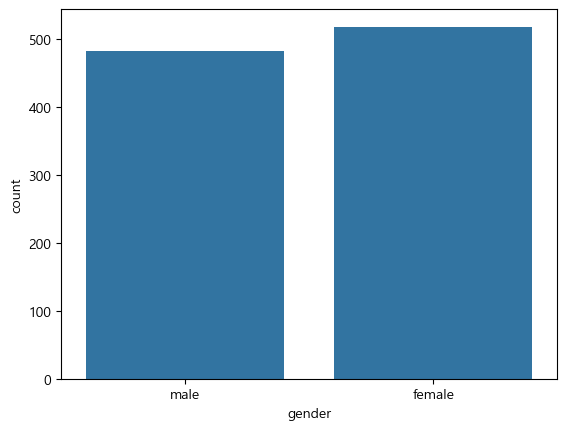

In [7]:
sns.countplot(x="gender", data=df, order=["male", "female"])

<Axes: xlabel='race/ethnicity', ylabel='count'>

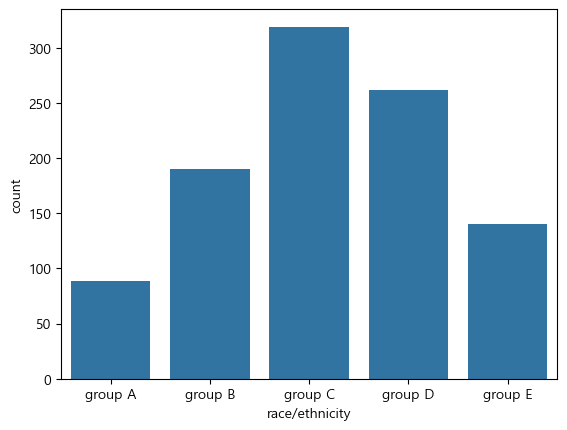

In [8]:
sns.countplot(x="race/ethnicity", data=df, order=['group A','group B','group C','group D','group E',])

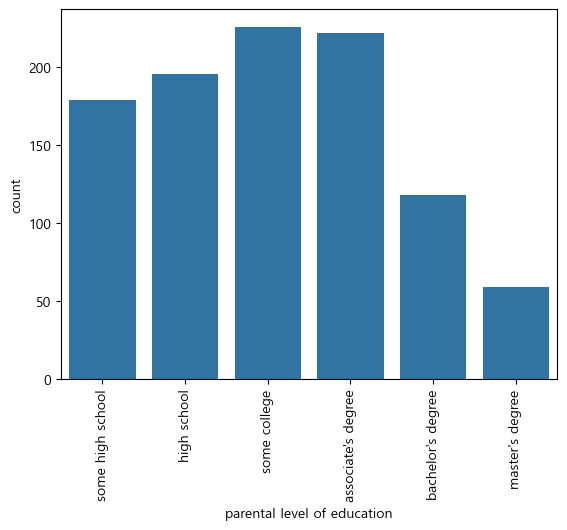

In [12]:
sns.countplot(x="parental level of education", data=df, order=[ "some high school", "high school","some college", "associate's degree", "bachelor's degree", "master's degree"])
plt.xticks(rotation=90)
plt.show()

<Axes: xlabel='lunch', ylabel='count'>

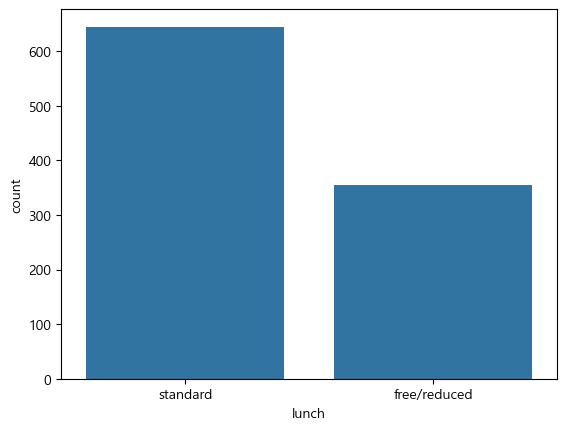

In [13]:
sns.countplot(x="lunch", data=df)

<Axes: xlabel='test preparation course', ylabel='count'>

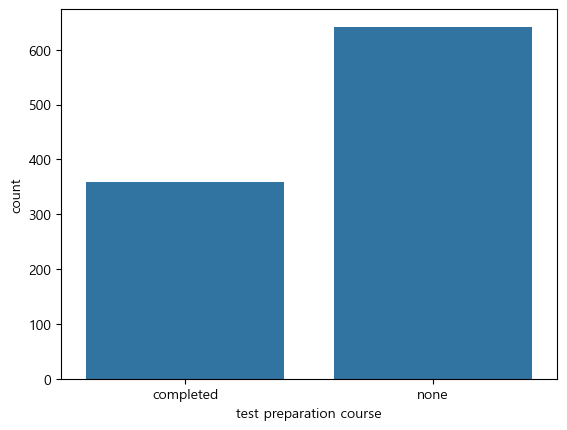

In [11]:
sns.countplot(x="test preparation course", data=df, order=["completed", "none"])

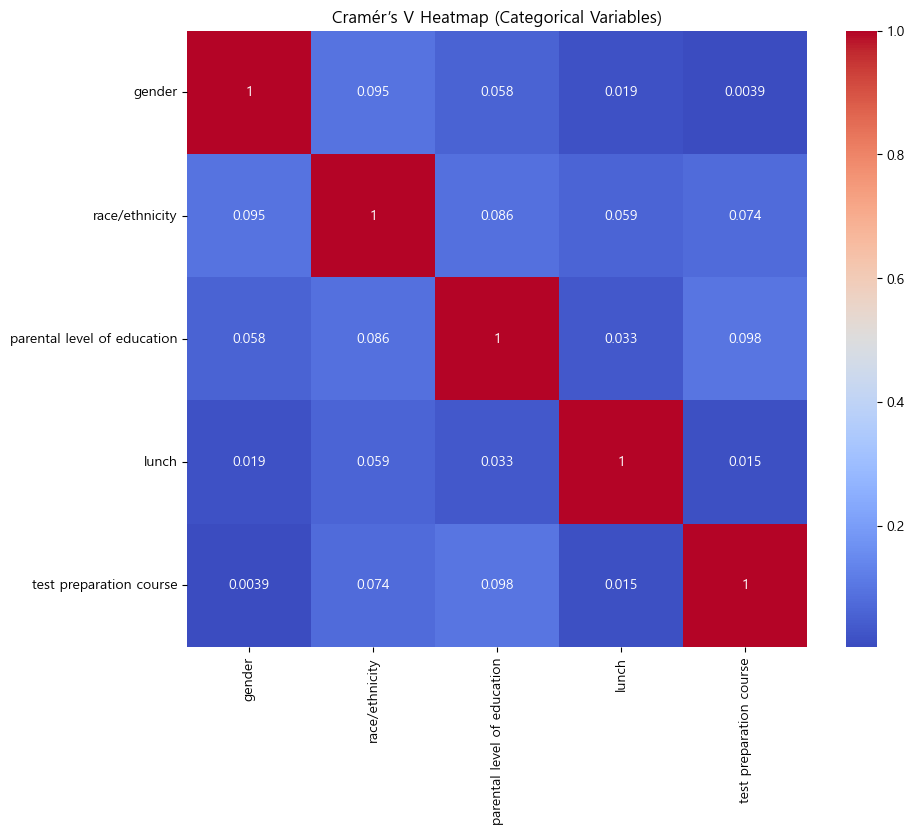

In [18]:
import scipy.stats as stats
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = stats.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    r, k = confusion_matrix.shape
    return np.sqrt(chi2 / (n * (min(r, k) - 1)))

cramers_results = pd.DataFrame(index=x.columns, columns=x.columns)

for var1 in x.columns:
    for var2 in x.columns:
        if var1 == var2:
            cramers_results.loc[var1, var2] = 1.0
        else:
            cramers_results.loc[var1, var2] = cramers_v(df[var1], df[var2])

cramers_results = cramers_results.astype(float)

plt.figure(figsize=(10, 8))
sns.heatmap(cramers_results, annot=True, cmap='coolwarm')
plt.title("Cramér’s V Heatmap (Categorical Variables)")
plt.show()

In [27]:
df = pd.get_dummies(df)
df

,math score,reading score,writing score,gender_female,gender_male,race/ethnicity_group A,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,parental level of education_associate's degree,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,parental level of education_some high school,lunch_free/reduced,lunch_standard,test preparation course_completed,test preparation course_none
0,72,72,74,True,False,False,True,False,False,False,False,True,False,False,False,False,False,True,False,True
1,69,90,88,True,False,False,False,True,False,False,False,False,False,False,True,False,False,True,True,False
2,90,95,93,True,False,False,True,False,False,False,False,False,False,True,False,False,False,True,False,True
3,47,57,44,False,True,True,False,False,False,False,True,False,False,False,False,False,True,False,False,True
4,76,78,75,False,True,False,False,True,False,False,False,False,False,False,True,False,False,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,88,99,95,True,False,False,False,False,False,True,False,False,False,True,False,False,False,True,True,False
996,62,55,55,False,True,False,False,True,False,False,False,False,True,False,False,False,True,False,False,True
997,59,71,65,True,False,False,False,True,False,False,False,False,True,False,False,False,True,False,True,False
998,68,78,77,True,False,False,False,False,True,False,False,False,False,False,True,False,False,True,True,False


In [28]:
df.shape

(1000, 20)